# Impute missing values using generalized low rank model on H2O

### Initiate h2o cluster

In [1]:
library(h2o)
h2o.init(nthreads = -1, max_mem_size = '10G')
# localH2O <- h2o.init(ip = 'localhost', port = 54321, max_mem_size = '24G', nthreads=-1)


----------------------------------------------------------------------

Your next step is to start H2O:
    > h2o.init()

For H2O package documentation, ask for help:
    > ??h2o

After starting H2O, you can use the Web UI at http://localhost:54321
For more information visit http://docs.h2o.ai

----------------------------------------------------------------------


Attaching package: ‘h2o’

The following objects are masked from ‘package:stats’:

    cor, sd, var

The following objects are masked from ‘package:base’:

    &&, %*%, %in%, ||, apply, as.factor, as.numeric, colnames,
    colnames<-, ifelse, is.character, is.factor, is.numeric, log,
    log10, log1p, log2, round, signif, trunc



 Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         7 days 21 hours 
    H2O cluster timezone:       America/Los_Angeles 
    H2O data parsing timezone:  UTC 
    H2O cluster version:        3.17.0.4201 
    H2O cluster version age:    10 days  
    H2O cluster name:           H2O_started_from_R_mobing_nrz890 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   8.57 GB 
    H2O cluster total cores:    8 
    H2O cluster allowed cores:  8 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    H2O Internal Security:      FALSE 
    H2O API Extensions:         XGBoost, Algos, AutoML, Core V3, Core V4 
    R Version:                  R version 3.3.2 (2016-10-31) 



### Import sample data to h2o

In [2]:
data.hex <- h2o.importFile(path = normalizePath(
    "PHBsample14_cleaned_small.csv"
#     "lowrank_archetypes.csv"
)
                           , destination_frame = "data.hex")

data.hex$C1 <- NULL

  |======================================================================| 100%


In [3]:
dim(data.hex)

[1] 6000  515

In [4]:
h2o.names(data.hex)

[1] "X"                                           
  [2] "Gender"                                      
  [3] "JointInd"                                    
  [4] "SCPeriod"                                    
  [5] "GMDBInd"                                     
  [6] "Dist"                                        
  [7] "Comm"                                        
  [8] "OriginalOwner_C1"                            
  [9] "Match1"                                      
 [10] "Nielsen.County.Size.Code_C3"                 
 [11] "Dwell.Type.Indicator_C3"                     
 [12] "Home.Owner.Renter.Indicator_C3"              
 [13] "Household.Education.Indicator_C3"            
 [14] "Number.of.Adults.Indicator_C3"               
 [15] "Length.of.Residence.Level_C3"                
 [16] "Household.Age.Indicator_C3"                  
 [17] "Presence.of.Kids.Indicator_C3"               
 [18] "Household.Size.Indicator_C3"                 
 [19] "Target.Narrow.Band.Income.Indicator_C3"      
 [20] "Match3"                                      
 [21] "Match4"                                      
 [22] "Qual"                                        
 [23] "EligibleInd"                                 
 [24] "FirstEligQInd"                               
 [25] "UtilizationInd"                              
 [26] "PolNum_UW"                                   
 [27] "IssAgeALB"                                   
 [28] "Dur"                                         
 [29] "AV"                                          
 [30] "WDtoDate"                                    
 [31] "WDCount"                                     
 [32] "AVPctEq"                                     
 [33] "LotSize_C1"                                  
 [34] "BuildingArea_C1"                             
 [35] "EstMarketValue_C1"                           
 [36] "MarkettoArea_C1"                             
 [37] "CEN_bg_populationDensity"                    
 [38] "CEN_bg_pctMale"                              
 [39] "CEN_bg_age85plus"                            
 [40] "CEN_bg_ageUnder5"                            
 [41] "CEN_bg_ageUnder10"                           
 [42] "CEN_bg_ageUnder15"                           
 [43] "CEN_bg_pctFamilyHH"                          
 [44] "CEN_bg_pctMarriedHH"                         
 [45] "CEN_bg_pctMalenoWifeHH"                      
 [46] "CEN_bg_pctFemalenoHusbandHH"                 
 [47] "CEN_bg_pctLiveAloneHH"                       
 [48] "CEN_bg_pctNoHSGrad"                          
 [49] "CEN_bg_pctHSGrad"                            
 [50] "CEN_bg_pctSomeCollege"                       
 [51] "CEN_bg_pctAssociateDegree"                   
 [52] "CEN_bg_pctBachelorDegree"                    
 [53] "CEN_bg_pctMastersDegree"                     
 [54] "CEN_bg_pctProfessionalDegree"                
 [55] "CEN_bg_pctDoctorateDegree"                   
 [56] "CEN_bg_pctHHincomeLT10K"                     
 [57] "CEN_bg_pctHHincomeLT15K"                     
 [58] "CEN_bg_pctHHincomeGE200K"                    
 [59] "CEN_bg_pctHHWageIncome"                      
 [60] "CEN_bg_pctHHSelfEmpIncome"                   
 [61] "CEN_bg_pctHHInvestIncome"                    
 [62] "CEN_bg_pctHHSocialSecurityIncome"            
 [63] "CEN_bg_pctHHSuppSocSecInc"                   
 [64] "CEN_bg_pctHHPublicAssistIncome"              
 [65] "CEN_bg_pctHHRetirementIncome"                
 [66] "CEN_bg_pctHHOtherIncome"                     
 [67] "CEN_bg_pctWorkforceFemale"                   
 [68] "CEN_bg_pctWorkforceForProfit"                
 [69] "CEN_bg_pctWorkforceNonProfit"                
 [70] "CEN_bg_pctWorkforceGovt"                     
 [71] "CEN_bg_pctWorkforceSelfEmp"                  
 [72] "CEN_bg_pctWorkforceFamily"                   
 [73] "CEN_bg_pctVacantHousingUnits"                
 [74] "CEN_bg_pctOwnerOccUnits"                     
 [75] "CEN_bg_pctRenterOccUnits"                    
 [76] "CEN_bg_pctSeasonalHo

In [5]:
h2o.str(data.hex)

Class 'H2OFrame' <environment: 0x7fd236c0e780> 
 - attr(*, "op")= chr "cols"
 - attr(*, "eval")= logi TRUE
 - attr(*, "id")= chr "RTMP_sid_92f5_1"
 - attr(*, "nrow")= int 6000
 - attr(*, "ncol")= int 515
 - attr(*, "types")=List of 515
  ..$ : chr "int"
  ..$ : chr "enum"
  ..$ : chr "enum"
  ..$ : chr "int"
  ..$ : chr "enum"
  ..$ : chr "enum"
  ..$ : chr "enum"
  ..$ : chr "enum"
  ..$ : chr "enum"
  ..$ : chr "enum"
  ..$ : chr "enum"
  ..$ : chr "enum"
  ..$ : chr "enum"
  ..$ : chr "enum"
  ..$ : chr "enum"
  ..$ : chr "enum"
  ..$ : chr "enum"
  ..$ : chr "enum"
  ..$ : chr "enum"
  ..$ : chr "enum"
  ..$ : chr "enum"
  ..$ : chr "enum"
  ..$ : chr "enum"
  ..$ : chr "enum"
  ..$ : chr "enum"
  ..$ : chr "int"
  ..$ : chr "int"
  ..$ : chr "int"
  ..$ : chr "real"
  ..$ : chr "real"
  ..$ : chr "int"
  ..$ : chr "real"
  ..$ : chr "real"
  ..$ : chr "int"
  ..$ : chr "int"
  ..$ : chr "real"
  ..$ : chr "real"
  ..$ : chr "real"
  ..$ : chr "real"
  ..$ : chr "real"
  ..$ : chr 

### Data Munging

#### change Boolean and Categorical variables into factor

In [6]:
for (col in 2:8) {
    data.hex[,col] <- as.factor(as.character(data.hex[,col]))
}

In [7]:
str(data.hex[,2:8])

Class 'H2OFrame' <environment: 0x7fd239b7b588> 
 - attr(*, "op")= chr "cols"
 - attr(*, "eval")= logi TRUE
 - attr(*, "id")= chr "RTMP_sid_92f5_8"
 - attr(*, "nrow")= int 6000
 - attr(*, "ncol")= int 7
 - attr(*, "types")=List of 7
  ..$ : chr "enum"
  ..$ : chr "enum"
  ..$ : chr "enum"
  ..$ : chr "enum"
  ..$ : chr "enum"
  ..$ : chr "enum"
  ..$ : chr "enum"
 - attr(*, "data")='data.frame':	10 obs. of  7 variables:
  ..$ Gender          : Factor w/ 2 levels "F","M": 1 1 1 1 2 1 2 1 1 1
  ..$ JointInd        : Factor w/ 2 levels "N","Y": 1 1 2 1 1 1 2 1 1 1
  ..$ SCPeriod        : Factor w/ 8 levels "0","3","4","5",..: 2 6 3 2 5 3 7 5 7 3
  ..$ GMDBInd         : Factor w/ 2 levels "N","Y": 1 1 2 2 1 1 1 1 1 1
  ..$ Dist            : Factor w/ 5 levels "BK","CA","IA",..: 1 3 5 5 1 5 2 5 3 5
  ..$ Comm            : Factor w/ 5 levels "A","B","C","D",..: 2 5 3 2 1 1 2 2 1 3
  ..$ OriginalOwner_C1: Factor w/ 3 levels "","N","Y": 2 2 2 2 2 2 2 3 2 2


In [8]:
# Summary of Datatypes:
# PK: 1
# Boolean: 2:8
# Categorical: 9:20
# Positive Integer: 21:135
# Positive Numeric: 136:187
# Percentage Numeric: 188:500
# Real Value Numeric: 501:510

### Train glrm model

### First, Select K

In [9]:
glrm_K <- function(K_input){
    t0 = Sys.time()
    data.glrm <- h2o.glrm(
          training_frame = data.hex, 
         # impute variables except policy number 
          cols = c(2:ncol(data.hex)), 
          k = K_input, seed = 1234, init = "SVD", svd_method = "GramSVD", 
          loss = "Quadratic", 
          multi_loss = "Categorical",
          transform = "NORMALIZE",
          impute_original = TRUE,
          regularization_x = "Quadratic", regularization_y = "Quadratic", 
          max_iterations = 2000, min_step_size = 1e-6)
    t1 = Sys.time()
    return(data.glrm)
}

In [10]:
k_values = c(seq(20, 60, 5))
glrm_results = list(new(Class="H2ODimReductionModel"), length(k_values))
i = 1
for (k in k_values){
    print(paste0("Training GLRM model with K = ", k))
    t0 = Sys.time()
    glrm_results[[i]] = glrm_K(k)
    t1 = Sys.time()
    print("Model trained")
    print(t1-t0)
    i = i + 1
}

[1] "Training GLRM model with K = 20"
  |======================================================================| 100%
[1] "Model trained"
Time difference of 6.079315 mins
[1] "Training GLRM model with K = 25"
  |======================================================================| 100%
[1] "Model trained"
Time difference of 7.050287 mins
[1] "Training GLRM model with K = 30"
  |======================================================================| 100%
[1] "Model trained"
Time difference of 8.491046 mins
[1] "Training GLRM model with K = 35"
  |======================================================================| 100%
[1] "Model trained"
Time difference of 9.714007 mins
[1] "Training GLRM model with K = 40"
  |======================================================================| 100%
[1] "Model trained"
Time difference of 14.24189 mins
[1] "Training GLRM model with K = 45"
  |======================================================================| 100%
[1] "Model trained"
Time di

In [11]:
dfSelectK = data.frame()
for (i in 1:9){
    dfSelectK = rbind(dfSelectK, glrm_results[[i]]@model$model_summary)
}
dfSelectK$K_values = k_values

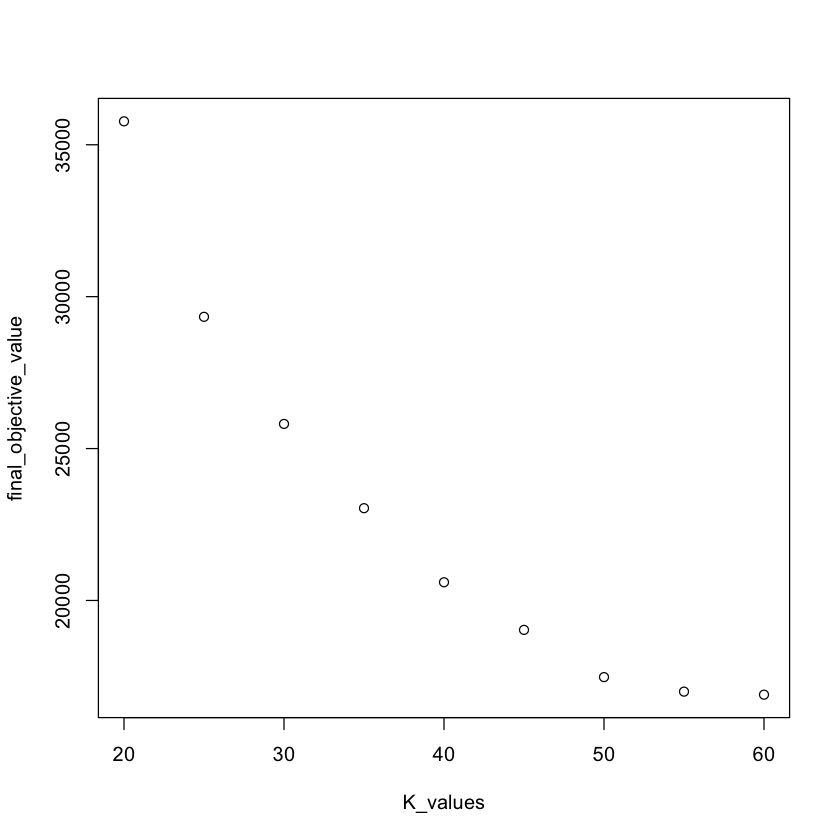

In [14]:
plot(dfSelectK[, c('K_values', 'final_objective_value')])

### When K = 50 objective function reached platuae, thus continue with this number of rank to train glrm

In [15]:
t0 = Sys.time()
data.glrm <- h2o.glrm(training_frame = data.hex, 
#                       impute variables except policy number 
                      cols = c(2:ncol(data.hex)), 
                      k = 50, seed = 1234, init = "SVD", svd_method = "GramSVD", 
#                       Specify different loss function for different data types
#                       loss_by_col = c("Ordinal"),
#                       loss_by_col_idx = c(5),
#                       loss_by_col_idx = c(3:4, 5, 6:26, 28:ncol(data.hex)),
                      loss = "Quadratic", 
                      multi_loss = "Categorical",
                      transform = "NORMALIZE",
                      impute_original = TRUE,
                      regularization_x = "Quadratic", regularization_y = "Quadratic", 
                      max_iterations = 200, min_step_size = 1e-6)
t1 = Sys.time()

  |======================================================================| 100%


Time difference of 2.777899 mins


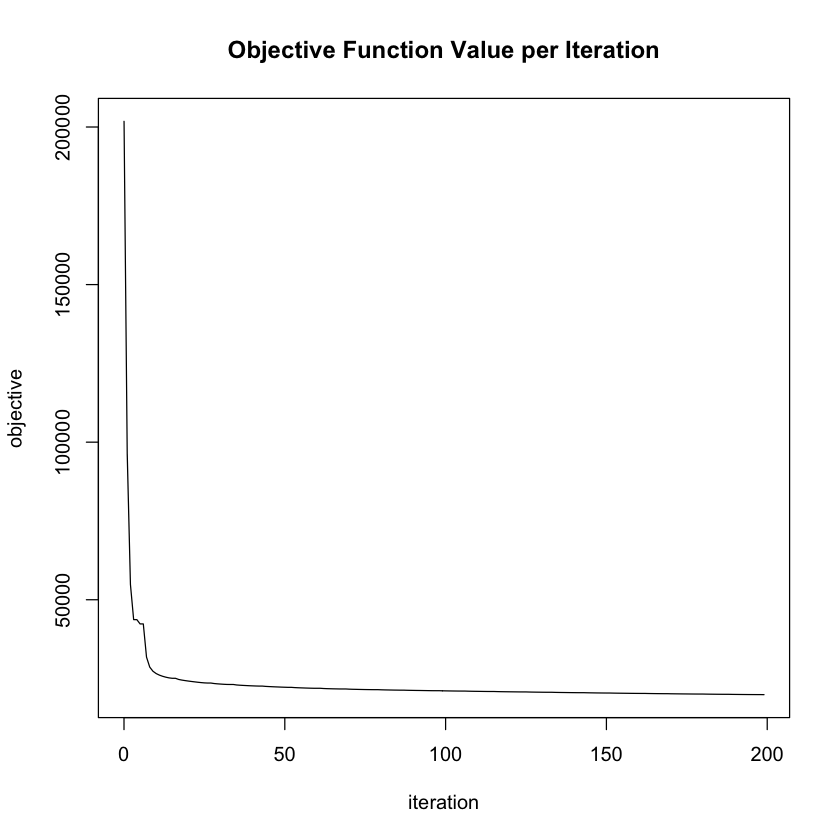

In [16]:
print(t1-t0)

plot(data.glrm)

### Next, export and imputation
#### 1. Low rank representation, principal stances

In [20]:
rep <- h2o.getFrame(data.glrm@model$representation_name)
h2o.exportFile(rep, path = "lowrank_rep.csv")
rep_rframe <- as.data.frame(rep)

  |======================================================================| 100%


#### 2. Get archetypes

In [21]:
archetypes <- h2o.proj_archetypes(data.glrm, data.hex, reverse_transform = TRUE) 
h2o.exportFile(archetypes, path = "lowrank_archetypes.csv")
archetypes_rframe <- as.data.frame(archetypes)

  |======================================================================| 100%


#### 3. Reconstruct the original matrix

In [ ]:
data.pred <- predict(data.glrm, data.hex)
h2o.exportFile(data.pred, path = "recontr_data.csv")
reconstr_rframe <- as.data.frame(data.pred)

  |======================================================================| 100%
  |======================================================================| 100%


### Shutdown h2o cluster

In [ ]:
h2o.shutdown(prompt = FALSE)